In [6]:
from torchvision import transforms, datasets
from torch.utils.data import Subset
import matplotlib.pyplot as plt

# EMNIST

Train counts:
Label A: 4800 samples
Label B: 4800 samples

Test counts:
Label A: 800 samples
Label B: 800 samples


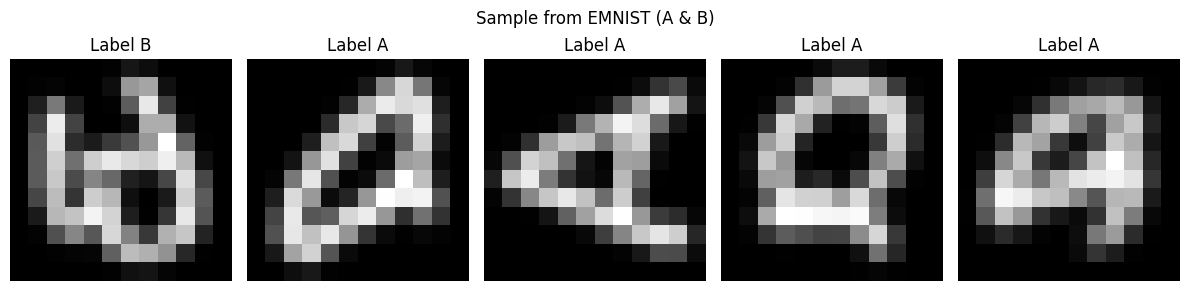

In [9]:
TARGET_CLASSES = [1, 2]
img_size = 12
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor()
    # transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.EMNIST(root='./Emnist', split='letters',train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(root='./Emnist', split='letters',train=False, download=True, transform=transform)

def filter_classes(dataset):
    indices = [i for i, (_, label) in enumerate(dataset) if label in TARGET_CLASSES]
    subset = Subset(dataset, indices)
    return subset
    
train_dataset = filter_classes(train_dataset)
test_dataset = filter_classes(test_dataset)

# Đếm số lượng theo nhãn
def count_labels(subset):
    label_counts = {label: 0 for label in TARGET_CLASSES}
    for _, label in subset:
        label_counts[label] += 1
    return label_counts

train_counts = count_labels(train_dataset)
test_counts = count_labels(test_dataset)

# In ra số lượng
print("Train counts:")
for k, v in train_counts.items():
    print(f"Label {chr(k + 64)}: {v} samples")  # chr(k + 64): 1 -> A, 2 -> B

print("\nTest counts:")
for k, v in test_counts.items():
    print(f"Label {chr(k + 64)}: {v} samples")

# Vẽ một vài ảnh minh họa
def plot_samples(subset, title, n=5):
    fig, axs = plt.subplots(1, n, figsize=(12, 3))
    count = 0
    for img, label in subset:
        axs[count].imshow(img.squeeze().numpy(), cmap='gray')
        axs[count].set_title(f"Label {chr(label + 64)}")
        axs[count].axis('off')
        count += 1
        if count == n:
            break
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_samples(train_dataset, title="Sample from EMNIST (A & B)")

# MNIST

Train counts:
Label 0: 5923 samples
Label 1: 6742 samples

Test counts:
Label 0: 980 samples
Label 1: 1135 samples


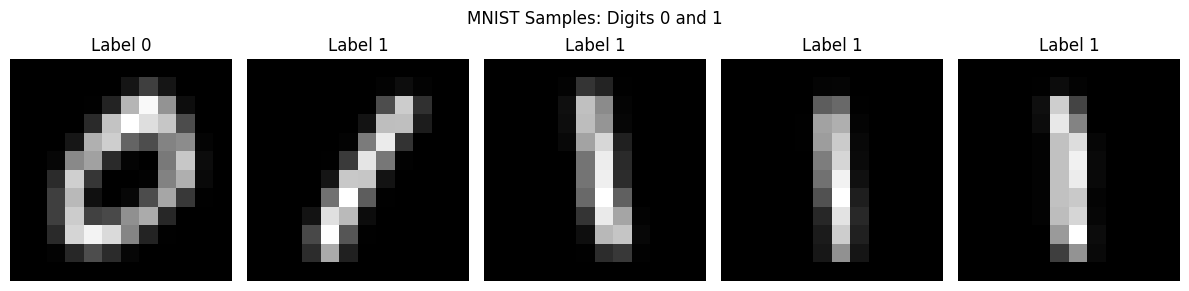

In [12]:
TARGET_CLASSES = [0, 1]
img_size = 12
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor()
    # transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./Mnist',train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./Mnist',train=False, download=True, transform=transform)

# Hàm lọc theo nhãn
def filter_classes(dataset):
    indices = [i for i, (_, label) in enumerate(dataset) if label in TARGET_CLASSES]
    subset = Subset(dataset, indices)
    return subset

train_dataset = filter_classes(train_dataset)
test_dataset = filter_classes(test_dataset)

# Thống kê số lượng mẫu
def count_labels(subset):
    label_counts = {label: 0 for label in TARGET_CLASSES}
    for _, label in subset:
        label_counts[label] += 1
    return label_counts

train_counts = count_labels(train_dataset)
test_counts = count_labels(test_dataset)

# In ra số lượng
print("Train counts:")
for k, v in train_counts.items():
    print(f"Label {k}: {v} samples")

print("\nTest counts:")
for k, v in test_counts.items():
    print(f"Label {k}: {v} samples")

# Hàm vẽ một vài ảnh minh họa
def plot_samples(subset, title, n=5):
    fig, axs = plt.subplots(1, n, figsize=(12, 3))
    count = 0
    for img, label in subset:
        axs[count].imshow(img.squeeze().numpy(), cmap='gray')
        axs[count].set_title(f"Label {label}")
        axs[count].axis('off')
        count += 1
        if count == n:
            break
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_samples(train_dataset, title="MNIST Samples: Digits 0 and 1")